# Tasks 

**1. H0 (Null Hypothesis):** There is no correlation between the types of content (images, videos) in the text of social media posts with levels of engagement (likes, shares, comments) among consumers in the theme park industry.

**2. H1 (Alternative Hypothesis):** There is a correlation between specific types of content (images, videos) in the text of social media posts with higher levels of engagement (likes, shares, comments) among consumers in the theme park industry.

### Note

- **T-test**: This test is used to compare the means between two groups. However, in our case, we're dealing with multiple types of content, not just two. Therefore, the T-test is not the appropriate test for our hypothesis.

## Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.inspection import permutation_importance
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import shapiro, kruskal
from scipy.stats import mannwhitneyu
import warnings as ws
ws.filterwarnings("ignore")

In [2]:
# Load the dataset
themeparks1_df = pd.read_csv("Themeparcs I.csv", delimiter=';')
themeparks2_df = pd.read_csv("Themeparcs II.csv", delimiter=';')
themeparks3_df = pd.read_csv("Themeparcs III.csv", delimiter=';')
themeparks4_df = pd.read_csv("Themeparcs IV.csv", delimiter=';')

# Concatenate DataFrames
df = pd.concat([themeparks1_df, themeparks2_df, themeparks3_df, themeparks4_df], ignore_index=True)

# Display the first few rows of the dataframe and its summary
df.info(), df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15443 entries, 0 to 15442
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Date                          15443 non-null  object 
 1   Profile                       15443 non-null  object 
 2   Message                       15443 non-null  object 
 3   Number of Reactions           15443 non-null  float64
 4   Number of Shares              0 non-null      float64
 5   Number of Comments (primary)  15443 non-null  float64
 6   Number of Shares.1            15443 non-null  float64
 7   Comments per post             15443 non-null  float64
 8   Comments on posts by fans     15443 non-null  float64
 9   Post interaction rate         15443 non-null  object 
 10  Engagement                    15443 non-null  object 
 11  Number of Likes               15443 non-null  float64
 12  Link-posts                    555 non-null    float64
 13  P

(None,
                Date                     Profile  \
 0  12/31/23 9:40 PM  Wild Adventures Theme Park   
 1  12/31/23 8:01 PM            Fun Spot America   
 2  12/31/23 7:30 PM            Fun Spot America   
 3  12/31/23 7:00 PM            Disneyland Paris   
 4  12/31/23 7:00 PM       Silverwood Theme Park   
 
                                              Message  Number of Reactions  \
 0  🎟️🚨 Today's the FINAL day to use your 2023 Sea...                 16.0   
 1  See you next year! 😉                Don’t miss...                 38.0   
 2  Don't miss our HUGE firework display ! 🥳\n\n#f...                 23.0   
 3     Fijne jaarwisseling! 🥂🎉\nEn tot volgend jaar 😉                646.0   
 4  It's the last day of our New Year's Sale! Save...                 17.0   
 
    Number of Shares  Number of Comments (primary)  Number of Shares.1  \
 0               NaN                           2.0                 2.0   
 1               NaN                           1.0           

The dataset consists of 15,443 entries and 19 columns related to social media posts from the theme park industry. Here's a brief overview of some of the relevant columns for your analysis:

- **Date**: The date and time when the post was made.
- **Profile**: The theme park profile that made the post.
- **Message**: The content of the post.
- **Number of Reactions**: The total number of reactions a post received.
- **Number of Shares (primary) and Number of Shares.1**: It seems there might be a duplication or correction needed here since "Number of Shares" column is all null, but "Number of Shares.1" contains data.
- **Number of Comments (primary)**: The total number of primary comments a post received.
- **Engagement**: A column labeled "Engagement", though its format and meaning need clarification as it appears in a format that might require cleaning or decoding.
- **Number of Likes**: The total number of likes a post received.
- **Link-posts, Picture Posts, Video-posts**: These columns seem to indicate the presence of a link, picture, or video in the posts, respectively, but contain many null values, suggesting that not all posts contain such content.

## Data Cleaning and Preprocessing

In [3]:
# Dropping unwanted and duplicate columns
df_cleaned = df.drop(columns=['Number of Shares', 'Post interaction rate'])

# Renaming "Number of Shares.1" to "Number of Shares" for clarity
df_cleaned = df_cleaned.rename(columns={'Number of Shares.1': 'Number of Shares'})

In [4]:
df_cleaned.info(), df_cleaned.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15443 entries, 0 to 15442
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Date                          15443 non-null  object 
 1   Profile                       15443 non-null  object 
 2   Message                       15443 non-null  object 
 3   Number of Reactions           15443 non-null  float64
 4   Number of Comments (primary)  15443 non-null  float64
 5   Number of Shares              15443 non-null  float64
 6   Comments per post             15443 non-null  float64
 7   Comments on posts by fans     15443 non-null  float64
 8   Engagement                    15443 non-null  object 
 9   Number of Likes               15443 non-null  float64
 10  Link-posts                    555 non-null    float64
 11  Picture Posts                 11562 non-null  float64
 12  Video-posts                   2479 non-null   float64
 13  P

(None,
                Date                     Profile  \
 0  12/31/23 9:40 PM  Wild Adventures Theme Park   
 1  12/31/23 8:01 PM            Fun Spot America   
 2  12/31/23 7:30 PM            Fun Spot America   
 3  12/31/23 7:00 PM            Disneyland Paris   
 4  12/31/23 7:00 PM       Silverwood Theme Park   
 
                                              Message  Number of Reactions  \
 0  🎟️🚨 Today's the FINAL day to use your 2023 Sea...                 16.0   
 1  See you next year! 😉                Don’t miss...                 38.0   
 2  Don't miss our HUGE firework display ! 🥳\n\n#f...                 23.0   
 3     Fijne jaarwisseling! 🥂🎉\nEn tot volgend jaar 😉                646.0   
 4  It's the last day of our New Year's Sale! Save...                 17.0   
 
    Number of Comments (primary)  Number of Shares  Comments per post  \
 0                           2.0               2.0                2.0   
 1                           1.0               2.0             

For the hypothesis **H0** and **H1**, let's evaluate the relevance of the "Link", "Message", "Profile-ID", and "Post-ID" columns:

#### Link
- **Relevance**: Not directly relevant.
- **Reason**: The "Link" column likely contains URLs to the actual posts. While it can be useful for verification or manual inspection of the posts, it does not directly contribute to quantitative analysis related to the hypothesis. The presence or absence of a link in the post content is already captured by the "Link-posts" column, which is directly relevant to our analysis.

#### Message
- **Relevance**: Potentially relevant.
- **Reason**: The "Message" column contains the text of the posts. Text analysis or natural language processing (NLP) techniques could potentially extract additional features from this text, such as sentiment, topics, or the presence of specific keywords that could influence engagement. However, for the direct analysis of the correlation between content types (images, videos) and engagement, this column is not as straightforwardly relevant as the columns explicitly indicating content types.

#### Profile-ID
- **Relevance**: Not directly relevant.
- **Reason**: The "Profile-ID" represents the unique identifier of the theme park profiles that made the posts. Unless the analysis aims to segment or compare engagement across different theme parks, this column does not directly contribute to understanding the correlation between content types and engagement. It's more of a categorical identifier for grouping or filtering data.

#### Post-ID
- **Relevance**: Not directly relevant.
- **Reason**: Similar to "Profile-ID", the "Post-ID" serves as a unique identifier for each post. It's crucial for data management, ensuring the uniqueness of rows and potentially for joining with other data sources. However, it does not contribute directly to the analysis of content types and engagement levels.

#### Conclusion
- Columns such as "Link-posts", "Picture Posts", and "Video-posts" are directly relevant to H0 and H1 as they categorically indicate the type of content in a post.
- Engagement metrics (likes, shares, comments) are also directly relevant as they quantify the level of engagement.
- Other columns like "Link", "Message", "Profile-ID", and "Post-ID" may hold value for broader analyses, data management, or feature engineering but do not directly address the hypothesis about content types and engagement levels.

In [5]:
# Let's remove these columns
df_cleaned = df_cleaned.drop(columns=['Link', 'Message', 'Profile-ID', 'Post-ID'])

In [6]:
# Convert "Date" to datetime format
df_cleaned['Date'] = pd.to_datetime(df_cleaned['Date'], errors='coerce')

In [7]:
# For content type columns ("Link-posts", "Picture Posts", "Video-posts"), we'll fill missing values with 0, indicating the absence of that content type.
df_cleaned[['Link-posts', 'Picture Posts', 'Video-posts']] = df_cleaned[['Link-posts', 'Picture Posts', 'Video-posts']].fillna(0)

In [8]:
# Since Engagement is an object type, we need to convert it to a numeric type. But first, we need to clean its format.
df_cleaned['Engagement'] = df_cleaned['Engagement'].str.replace(',', '.')
df_cleaned['Engagement'] = pd.to_numeric(df_cleaned['Engagement'], errors='coerce')

In [9]:
# Creating a new column to summarize the content type of each post for visualization purposes
# If "Link-posts" > 0, it's a Link post, if "Picture Posts" > 0, it's a Picture post, if "Video-posts" > 0, it's a Video post.
# If none of these conditions are met, it's a Text-only post.
conditions = [
    (df_cleaned['Link-posts'] > 0),
    (df_cleaned['Picture Posts'] > 0),
    (df_cleaned['Video-posts'] > 0)
]
choices = ['Link', 'Picture', 'Video']
df_cleaned['Content Type'] = np.select(conditions, choices, default='Text')

In [10]:
df_cleaned.info(), df_cleaned.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15443 entries, 0 to 15442
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Date                          15443 non-null  datetime64[ns]
 1   Profile                       15443 non-null  object        
 2   Number of Reactions           15443 non-null  float64       
 3   Number of Comments (primary)  15443 non-null  float64       
 4   Number of Shares              15443 non-null  float64       
 5   Comments per post             15443 non-null  float64       
 6   Comments on posts by fans     15443 non-null  float64       
 7   Engagement                    15443 non-null  float64       
 8   Number of Likes               15443 non-null  float64       
 9   Link-posts                    15443 non-null  float64       
 10  Picture Posts                 15443 non-null  float64       
 11  Video-posts                 

(None,
                  Date                     Profile  Number of Reactions  \
 0 2023-12-31 21:40:00  Wild Adventures Theme Park                 16.0   
 1 2023-12-31 20:01:00            Fun Spot America                 38.0   
 2 2023-12-31 19:30:00            Fun Spot America                 23.0   
 3 2023-12-31 19:00:00            Disneyland Paris                646.0   
 4 2023-12-31 19:00:00       Silverwood Theme Park                 17.0   
 
    Number of Comments (primary)  Number of Shares  Comments per post  \
 0                           2.0               2.0                2.0   
 1                           1.0               2.0                1.0   
 2                           2.0               3.0                2.0   
 3                          52.0              12.0               56.0   
 4                           2.0               0.0                2.0   
 
    Comments on posts by fans    Engagement  Number of Likes  Link-posts  \
 0                       

### Shapiro-Wilk Normality Test

In [11]:
# We will test the normality of the 'Engagement' variable for each content type
content_types = df_cleaned['Content Type'].unique()
normality_test_results = {}

for content_type in content_types:
    w_stat, p_value = shapiro(df_cleaned[df_cleaned['Content Type'] == content_type]['Engagement'].dropna())
    normality_test_results[content_type] = {'W-Statistic': w_stat, 'P-Value': p_value}

normality_test_results

{'Picture': {'W-Statistic': 0.7432076930999756, 'P-Value': 0.0},
 'Text': {'W-Statistic': 0.7069731950759888,
  'P-Value': 5.7844366567848826e-36},
 'Video': {'W-Statistic': 0.7045678496360779, 'P-Value': 0.0},
 'Link': {'W-Statistic': 0.7034310102462769, 'P-Value': 3.99490607844468e-30}}

The Shapiro-Wilk normality test for 'Engagement' across different content types has returned very low p-values for each content type, indicating that the null hypothesis of normality can be rejected for all groups. This means the normality assumption required for `ANOVA` is not satisfied, which is common with real-world data, especially with large sample sizes where even small deviations from normality can result in a significant test outcome.

**Given the violation of the normality assumption, it's not appropriate to use ANOVA directly**. Instead, we should consider a non-parametric alternative, such as the Kruskal-Wallis H-test, which does not assume a normal distribution of the data.

### Kruskal-Wallis H-test

Since we have more than two groups, Kruskal-Wallis H-test is suitable for this comparison

In [12]:
# Extracting the engagement scores for each content type
engagement_picture = df_cleaned[df_cleaned['Content Type'] == 'Picture']['Engagement'].dropna()
engagement_text = df_cleaned[df_cleaned['Content Type'] == 'Text']['Engagement'].dropna()
engagement_video = df_cleaned[df_cleaned['Content Type'] == 'Video']['Engagement'].dropna()
engagement_link = df_cleaned[df_cleaned['Content Type'] == 'Link']['Engagement'].dropna()

# Perform the Kruskal-Wallis H-test
h_stat, p_value = kruskal(engagement_picture, engagement_text, engagement_video, engagement_link)

h_stat, p_value

(16.63795601472214, 0.0008388405519618204)

The Kruskal-Wallis H-test has resulted in an H-statistic of approximately 16.64 with a p-value of about 0.00084. Since the p-value is less than 0.05, **we can reject the null hypothesis (H0) which stated that there is no difference in medians of engagement across different types of content**. This indicates that there is a statistically significant difference in the engagement levels among at least two of the content types (Picture, Text, Video, Link).

### Pairwise Mann-Whitney U tests

In [13]:
# Function to perform pairwise Mann-Whitney U tests between all groups
def perform_post_hoc_tests(groups):
    results = {}
    for i in range(len(groups)):
        for j in range(i+1, len(groups)):
            group1_name = groups[i][0]
            group2_name = groups[j][0]
            stat, p = mannwhitneyu(groups[i][1], groups[j][1])
            results[f'{group1_name} vs {group2_name}'] = {
                'U-Statistic': stat,
                'P-Value': p
            }
    return results

# Groups for comparison
groups = [
    ('Picture', engagement_picture),
    ('Text', engagement_text),
    ('Video', engagement_video),
    ('Link', engagement_link)
]

# Perform pairwise comparisons
post_hoc_results = perform_post_hoc_tests(groups)
post_hoc_results

{'Picture vs Text': {'U-Statistic': 5054322.0, 'P-Value': 0.11684108878798699},
 'Picture vs Video': {'U-Statistic': 14851126.5,
  'P-Value': 0.004517916373681834},
 'Picture vs Link': {'U-Statistic': 3438827.0,
  'P-Value': 0.004212270548358302},
 'Text vs Video': {'U-Statistic': 1058352.5, 'P-Value': 0.7247587412365069},
 'Text vs Link': {'U-Statistic': 248229.5, 'P-Value': 0.0752882408677293},
 'Video vs Link': {'U-Statistic': 721924.5, 'P-Value': 0.06834269131819183}}

From these results, we can see that there are statistically significant differences in engagement between:

- Picture and Video posts.
- Picture and Link posts.

There were no significant differences in engagement found between Text vs. Video, Text vs. Link, and Video vs. Link within the adjusted p-value threshold.

This analysis helps in identifying that certain types of content (Pictures) have significantly different levels of engagement when compared with Videos and Links.

## Feature Engineering

Let's create a column for seasons based on the "Date" column. We'll define seasons for the northern hemisphere as follows:
- Winter: December to February
- Spring: March to May
- Summer: June to August
- Autumn: September to November

In [14]:
# Function to assign season to a date
def get_season(date):
    if date.month in [12, 1, 2]:
        return 'Winter'
    elif date.month in [3, 4, 5]:
        return 'Spring'
    elif date.month in [6, 7, 8]:
        return 'Summer'
    else: # 9, 10, 11
        return 'Autumn'

# Apply the function to create the 'Season' column
df_cleaned['Season'] = df_cleaned['Date'].apply(get_season)

Making of new `Engagement` column because if our objective is to understand the correlation between content types and the combined engagement from reactions, comments, and shares, then it makes sense to use a composite metric that aggregates these individual engagement metrics. 

In [15]:
# Remove old one
df_cleaned = df_cleaned.drop(columns=['Engagement'])

In [16]:
# Add new one
df_cleaned['Engagement'] = df_cleaned['Number of Reactions'] + df_cleaned['Number of Comments (primary)'] + df_cleaned['Number of Shares']

In [17]:
df_cleaned.head()

,Date,Profile,Number of Reactions,Number of Comments (primary),Number of Shares,Comments per post,Comments on posts by fans,Number of Likes,Link-posts,Picture Posts,Video-posts,Content Type,Season,Engagement
0,2023-12-31 21:40:00,Wild Adventures Theme Park,16.0,2.0,2.0,2.0,2.0,13.0,0.0,1.0,0.0,Picture,Winter,20.0
1,2023-12-31 20:01:00,Fun Spot America,38.0,1.0,2.0,1.0,1.0,33.0,0.0,0.0,0.0,Text,Winter,41.0
2,2023-12-31 19:30:00,Fun Spot America,23.0,2.0,3.0,2.0,2.0,21.0,0.0,0.0,1.0,Video,Winter,28.0
3,2023-12-31 19:00:00,Disneyland Paris,646.0,52.0,12.0,56.0,56.0,478.0,0.0,1.0,0.0,Picture,Winter,710.0
4,2023-12-31 19:00:00,Silverwood Theme Park,17.0,2.0,0.0,2.0,2.0,16.0,0.0,0.0,1.0,Video,Winter,19.0


## Exploratory Data Analysis

In [18]:
# Set the style of seaborn
sns.set(style="whitegrid")

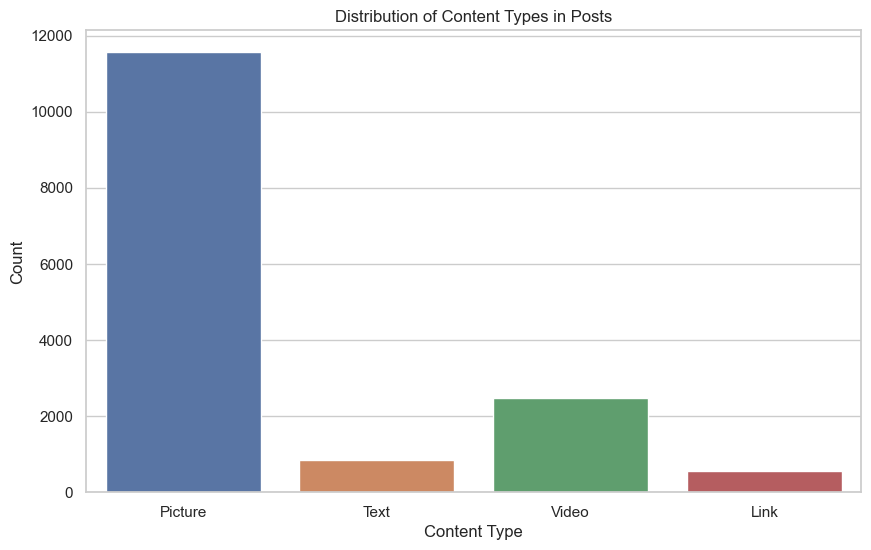

In [19]:
# 1. Distribution of Content Types
plt.figure(figsize=(10, 6))
sns.countplot(x='Content Type', data=df_cleaned)
plt.title('Distribution of Content Types in Posts')
plt.xlabel('Content Type')
plt.ylabel('Count')
plt.show()

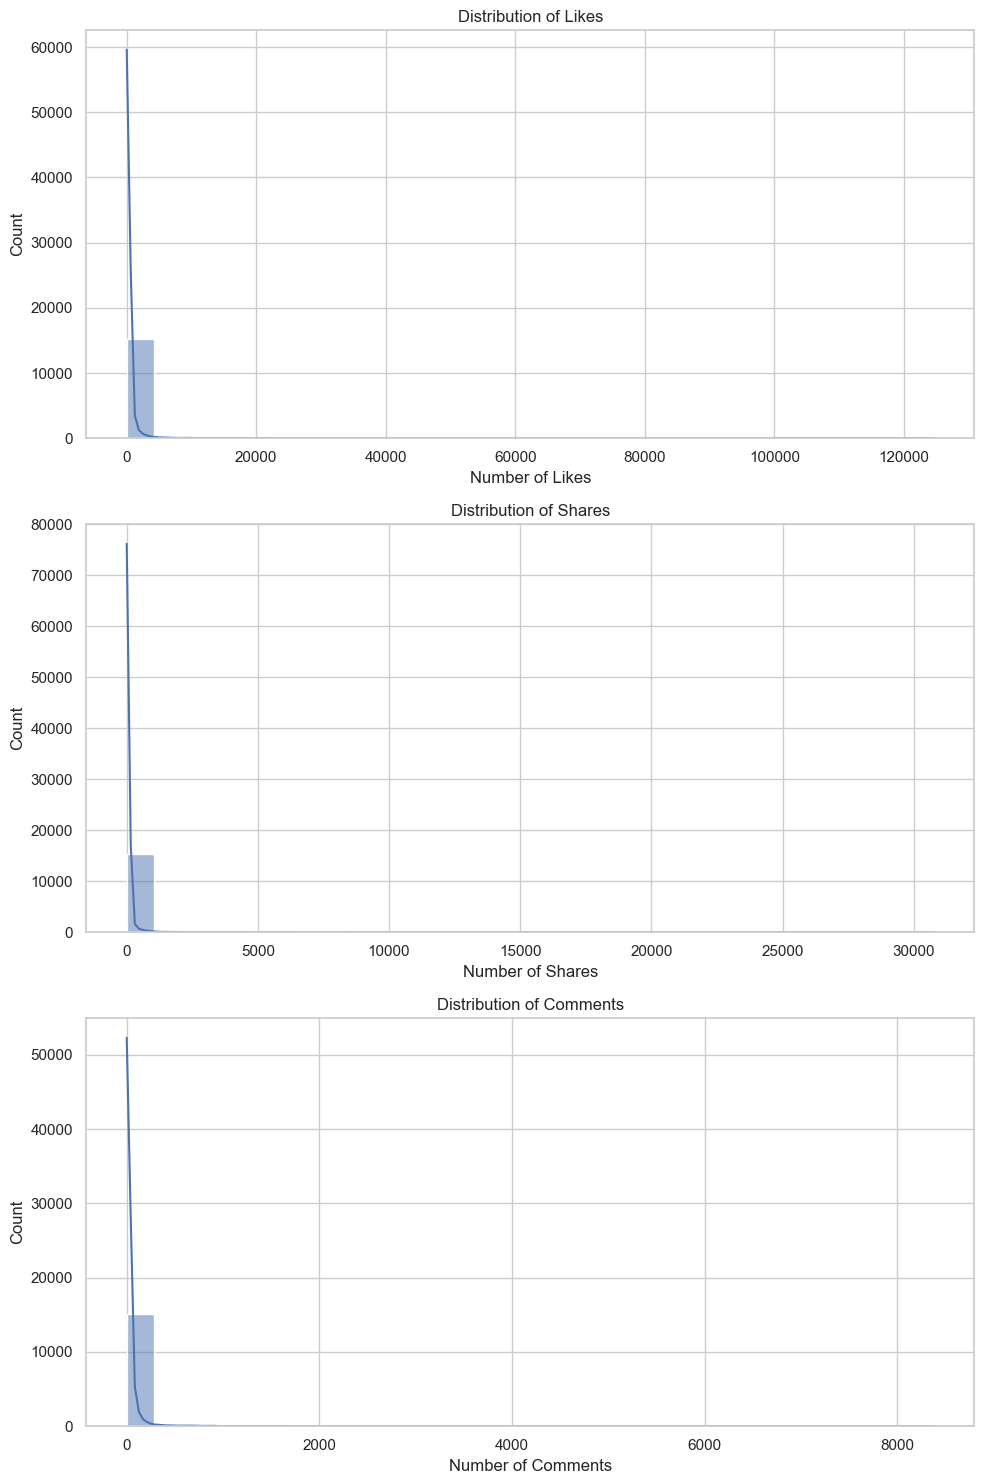

In [20]:
# 2. Engagement Metrics Distribution
fig, ax = plt.subplots(3, 1, figsize=(10, 15))

sns.histplot(df_cleaned['Number of Likes'], bins=30, kde=True, ax=ax[0])
ax[0].set_title('Distribution of Likes')
ax[0].set_xlabel('Number of Likes')
ax[0].set_ylabel('Count')

sns.histplot(df_cleaned['Number of Shares'], bins=30, kde=True, ax=ax[1])
ax[1].set_title('Distribution of Shares')
ax[1].set_xlabel('Number of Shares')
ax[1].set_ylabel('Count')

sns.histplot(df_cleaned['Number of Comments (primary)'], bins=30, kde=True, ax=ax[2])
ax[2].set_title('Distribution of Comments')
ax[2].set_xlabel('Number of Comments')
ax[2].set_ylabel('Count')

plt.tight_layout()
plt.show()

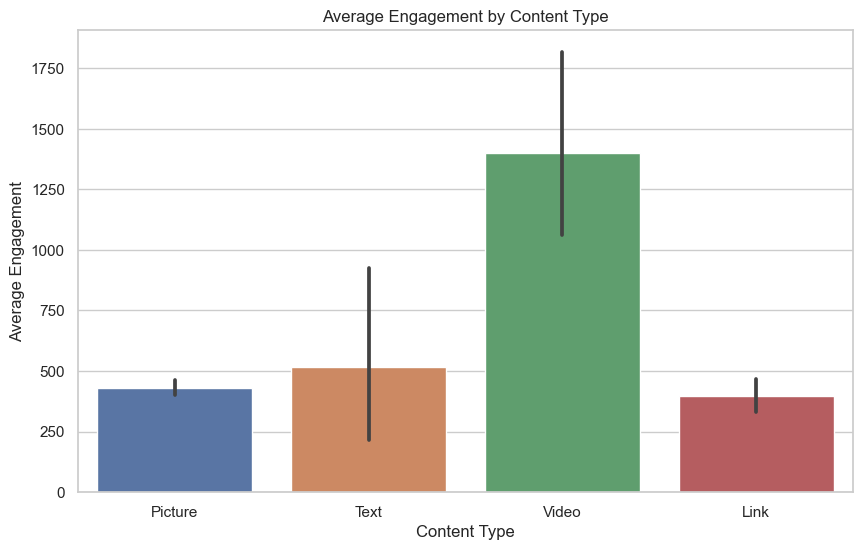

In [21]:
# 3. Average Engagement by Content Type
plt.figure(figsize=(10, 6))
sns.barplot(x='Content Type', y='Engagement', data=df_cleaned)
plt.title('Average Engagement by Content Type')
plt.xlabel('Content Type')
plt.ylabel('Average Engagement')
plt.show()

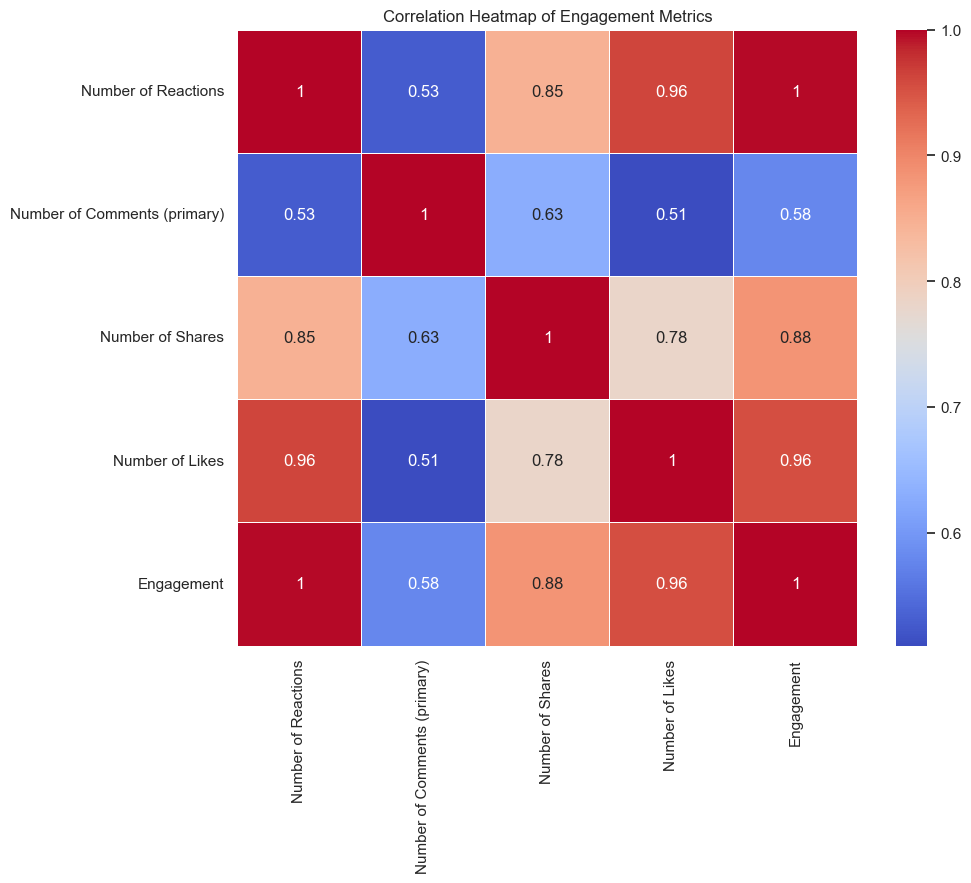

In [22]:
# 4. Correlation Heatmap of Engagement Metrics
# Selecting numerical columns for correlation analysis
engagement_cols = ['Number of Reactions', 'Number of Comments (primary)', 'Number of Shares', 'Number of Likes', 'Engagement']
corr_matrix = df_cleaned[engagement_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap of Engagement Metrics')
plt.show()

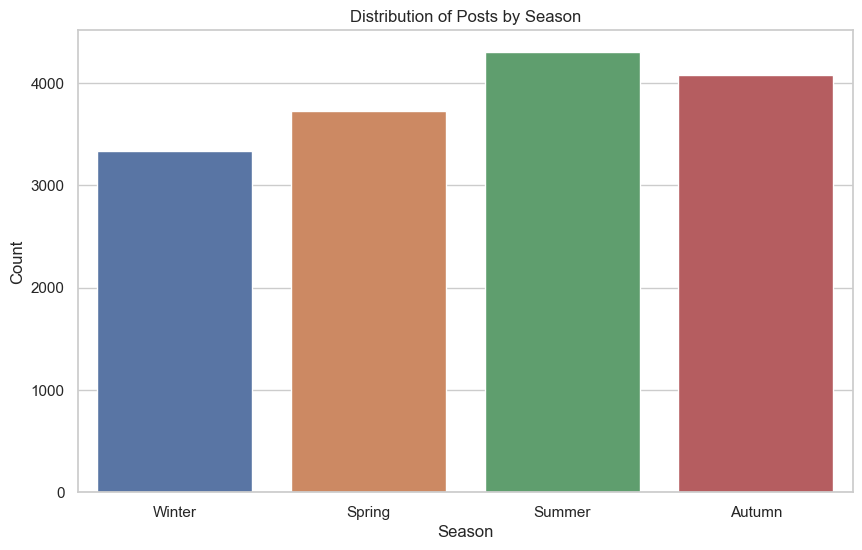

In [23]:
# 5. Distribution of Posts by Season
plt.figure(figsize=(10, 6))
sns.countplot(x='Season', data=df_cleaned, order=['Winter', 'Spring', 'Summer', 'Autumn'])
plt.title('Distribution of Posts by Season')
plt.xlabel('Season')
plt.ylabel('Count')
plt.show()

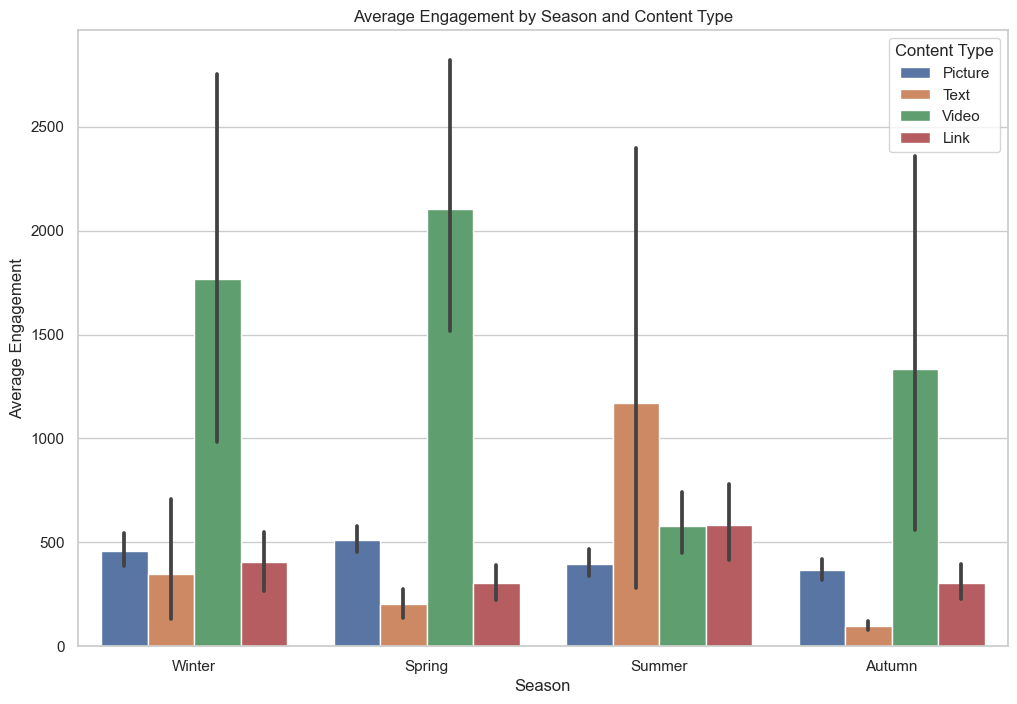

In [24]:
# 6. Average Engagement by Season and Content Type
plt.figure(figsize=(12, 8))
sns.barplot(x='Season', y='Engagement', hue='Content Type', data=df_cleaned, order=['Winter', 'Spring', 'Summer', 'Autumn'])
plt.title('Average Engagement by Season and Content Type')
plt.xlabel('Season')
plt.ylabel('Average Engagement')
plt.legend(title='Content Type')
plt.show()

**Insights**

1. **Distribution of Content Types in Posts**: The countplot shows the distribution of different types of content across the posts. This visualization helps in understanding which type of content is more prevalent in our dataset.

2. **Engagement Metrics Distribution**:
   - The distribution of likes, shares, and comments across posts is depicted through histograms. These plots reveal the distribution's skewness, indicating that most posts receive a low to moderate number of engagements, with fewer posts achieving very high engagement.

3. **Average Engagement by Content Type**: This bar plot shows the average engagement (likes, shares, comments) each content type (Link, Picture, Video, Text) receives. It provides insights into which type of content tends to generate more engagement on average.

4. **Correlation Heatmap of Engagement Metrics**: The heatmap illustrates the correlations between different engagement metrics. It helps identify how these metrics are related to each other, such as the relationship between the number of likes and the overall engagement score.
   
5. **Distribution of Posts by Season**: This countplot shows how the distribution of posts varies across seasons. This can indicate the periods of higher activity and potential seasonal marketing strategies by theme parks.
   
6. **Average Engagement by Season and Content Type**: The barplot illustrates that engagement levels vary not just with the content type but also across different seasons. This nuanced view can help understand if certain content types perform better in specific seasons.

**Observation:**
1. The analysis suggests that `content type` and `seasonality` both play significant roles in influencing engagement levels. Certain content types might be more effective in engaging the audience during specific seasons.
2. For instance, if we observe higher average engagement for video posts in summer, it might indicate a preference or greater consumer interaction with video content during that season, potentially due to more leisure time or thematic seasonal content.

## Modelling

In [25]:
# Selecting features and target variable
X = pd.get_dummies(df_cleaned[['Season', 'Content Type']], drop_first=True)
y = df_cleaned['Engagement']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [26]:
# Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [27]:
# Initializing the regression models
linear_model = LinearRegression()
decision_tree_model = DecisionTreeRegressor(random_state=42)
random_forest_model = RandomForestRegressor(random_state=42)

In [28]:
# Training the models
linear_model.fit(X_train_scaled, y_train)
decision_tree_model.fit(X_train, y_train) 
random_forest_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [29]:
# Predicting on the test set
linear_pred = linear_model.predict(X_test_scaled)
decision_tree_pred = decision_tree_model.predict(X_test)
random_forest_pred = random_forest_model.predict(X_test)

In [30]:
# Function to calculate and display metrics
def display_regression_metrics(y_test, y_pred, model_name):
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    print(f"Metrics for {model_name}:")
    print(f"Mean Absolute Error: {mae:.2f}")
    print(f"Mean Squared Error: {mse:.2f}")
    print(f"Root Mean Squared Error: {rmse:.2f}")
    print(f"R-squared: {r2:.2f}")
    print("")

In [31]:
# Displaying metrics for each model
display_regression_metrics(y_test, linear_pred, "Linear Regression")
display_regression_metrics(y_test, decision_tree_pred, "Decision Tree Regressor")
display_regression_metrics(y_test, random_forest_pred, "Random Forest Regressor")

Metrics for Linear Regression:
Mean Absolute Error: 779.41
Mean Squared Error: 5475874.89
Root Mean Squared Error: 2340.06
R-squared: -0.01

Metrics for Decision Tree Regressor:
Mean Absolute Error: 777.29
Mean Squared Error: 5502752.14
Root Mean Squared Error: 2345.79
R-squared: -0.02

Metrics for Random Forest Regressor:
Mean Absolute Error: 772.49
Mean Squared Error: 5490632.48
Root Mean Squared Error: 2343.21
R-squared: -0.01



**Linear Regression**:
- High prediction error with an RMSE of 2340.06, indicating the model may not be well-suited for predicting engagement.
- An R-squared value of -0.01 suggests the model fails to capture the variability of the engagement data.

**Decision Tree Regressor**:
- Similar prediction error as linear regression with an RMSE of 2345.79, showing significant inaccuracies in predictions.
- The negative R-squared value indicates that the model is worse than a simple mean-based model.

**Random Forest Regressor**:
- Slightly better but still high prediction error with an RMSE of 2343.21, indicating challenges in accurately predicting engagement.
- An R-squared value of -0.01 also suggests this model does not effectively explain the variation in engagement.

## Feature Importance

In [32]:
# Feature Importance from the Random Forest model
feature_importances = random_forest_model.feature_importances_
features = X.columns
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances}).sort_values(by='Importance', ascending=False)
feature_importance_df

,Feature,Importance
5,Content Type_Video,0.586098
1,Season_Summer,0.264135
0,Season_Spring,0.070765
2,Season_Winter,0.053060
4,Content Type_Text,0.017914
3,Content Type_Picture,0.008029


In [33]:
# Modeling with Gradient Boosting
gradient_boosting_model = GradientBoostingRegressor(random_state=42)
gradient_boosting_model.fit(X_train, y_train)
gradient_boosting_pred = gradient_boosting_model.predict(X_test)

In [34]:
# Evaluating Gradient Boosting Model
display_regression_metrics(y_test, gradient_boosting_pred, "Gradient Boosting Regression")

# Feature Importance from Gradient Boosting Model
gb_feature_importances = gradient_boosting_model.feature_importances_
gb_feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': gb_feature_importances}).sort_values(by='Importance', ascending=False)

Metrics for Gradient Boosting Regression:
Mean Absolute Error: 777.18
Mean Squared Error: 5502518.82
Root Mean Squared Error: 2345.74
R-squared: -0.02



In [35]:
print("Gradient Boosting Feature Importance: \n", gb_feature_importance_df)

Gradient Boosting Feature Importance: 
                 Feature  Importance
5    Content Type_Video    0.661580
1         Season_Summer    0.275702
0         Season_Spring    0.022338
4     Content Type_Text    0.018249
2         Season_Winter    0.011170
3  Content Type_Picture    0.010961


#### Random Forest Model - Feature Importance
The feature importance results from the Random Forest model offer insightful details about what influences engagement in the theme park industry's social media posts:

Video content is the most influential factor for engagement, with a feature importance score of 0.586098. This strongly supports the hypothesis that video content correlates with higher engagement.
Seasonal effects are significant, with posts in the summer having the next highest importance score (0.264135), indicating that time of the year also plays a crucial role in engagement levels.

#### Gradient Boosting Regression:

- The Gradient Boosting model, similar to the previous models, exhibits high prediction errors (MAE: 777.18, RMSE: 2345.74) and an R-squared value of -0.02, indicating a limited ability to predict engagement accurately.
- However, **video content** emerges even more strongly as the most critical feature for predicting engagement, with an importance score of 0.661580, reinforcing the hypothesis that video content significantly drives higher engagement.
- **Seasonal timing (especially summer)** follows as the next most influential feature, with an importance score of 0.275702, suggesting the timing of the post significantly impacts engagement.

**Takeaway**: Focusing on video content, particularly during the summer season, is likely to be the most effective strategy for boosting engagement on social media within the theme park industry, as per the Gradient Boosting model's feature importance analysis.

## Testing Correlation and Testing for Multicollinearity

- **Correlation Analysis with Spearman's Rank Correlation Coefficient**: Given the non-normal distribution of our engagement data and the ordinal nature of our content types (images, videos, etc.), we opted to use Spearman's rank correlation coefficient for our analysis. This method does not assume normality and is based on the ranks of the data, making it suitable for assessing the monotonic relationship between the types of content posted on social media and the levels of engagement (likes, shares, comments) they receive.
- **Multicollinearity Check using Variance Inflation Factor (VIF)**: To assess the multicollinearity among our independent variables, we calculated the Variance Inflation Factor (VIF) for each predictor. Prior to computing the VIF, we added a constant term to our matrix of independent variables to include the intercept in the model.

In [36]:
# Calculating Spearman's rank correlation
correlation_matrix = df_cleaned[['Engagement', 'Link-posts', 'Picture Posts', 'Video-posts']].corr(method='spearman')

# Displaying the correlation matrix
print(correlation_matrix)

               Engagement  Link-posts  Picture Posts  Video-posts
Engagement       1.000000    0.017215      -0.039760     0.092503
Link-posts       0.017215    1.000000      -0.333252    -0.084430
Picture Posts   -0.039760   -0.333252       1.000000    -0.754768
Video-posts      0.092503   -0.084430      -0.754768     1.000000


In [37]:
# Multicollinearity
X_with_constant = sm.add_constant(X)
vif_data = pd.DataFrame()
vif_data['Feature'] = X_with_constant.columns
vif_data['VIF'] = [variance_inflation_factor(X_with_constant.values, i) for i in range(X_with_constant.shape[1])]
vif_data

,Feature,VIF
0,const,30.853038
1,Season_Spring,1.459061
2,Season_Summer,1.483112
3,Season_Winter,1.428810
4,Content Type_Picture,5.489755
5,Content Type_Text,2.396542
6,Content Type_Video,4.592581


##### 1. Correlation Analysis:
- The correlation matrix indicates a positive Spearman correlation coefficient between `Video-posts` and `Engagement` (0.092503), suggesting a monotonic relationship where posts with video content tend to have higher engagement levels compared to other content types. This supports the H1 hypothesis that specific types of content, particularly videos, are associated with higher levels of engagement among consumers in the theme park industry.
- Conversely, `Picture Posts` show a slightly negative correlation with `Engagement` (-0.039760), implying that picture content might not be as strongly associated with higher engagement levels as video content. `Link-posts` have a very small positive correlation with engagement (0.017215), indicating a negligible direct relationship with engagement levels.

##### 2. Multicollinearity Analysis:
- The VIF results show that the `Content Type_Picture` has a VIF close to the threshold of concern (5.489755), suggesting moderate multicollinearity. This indicates that while there is some degree of multicollinearity present, it might not severely impact the reliability of the regression coefficients related to content types.
- The VIF for `Season_Spring`, `Season_Summer`, and `Season_Winter`, along with `Content Type_Text` and `Content Type_Video`, are well below the threshold of 5, indicating that these predictors do not exhibit problematic multicollinearity. This suggests that the model's inferences regarding the impact of these variables on engagement are likely reliable.

##### Conclusion for H1:
The correlation and multicollinearity analyses provide insightful findings into the relationship between content types and engagement levels. The positive correlation between video content and engagement supports the alternative hypothesis (H1) that specific types of content are associated with higher engagement levels, with video content being particularly impactful. While there is some indication of multicollinearity, particularly with picture content, it is not at a level that undermines the overall findings.

## Multilevel Model Analysis

This model will help to determine the extent to which content type is a predictor of engagement scores while accounting for other variables like seasons or profile-related effects that might introduce variability.

In [47]:
# For multilevel models, we need to ensure that the categories are coded as categorical types
df_cleaned['Content Type'] = df_cleaned['Content Type'].astype('category')

In [45]:
# Fit the mixed effects model
model = smf.mixedlm("Engagement ~ Q('Content Type')", df_cleaned, groups=df_cleaned["Season"])
mixedlm_results = model.fit()

In [46]:
# Output the model summary
mixedlm_results.summary()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                    Mixed Linear Model Regression Results
==============================================================================
Model:                   MixedLM       Dependent Variable:       Engagement   
No. Observations:        15443         Method:                   REML         
No. Groups:              4             Scale:                    18000937.5221
Min. group size:         3335          Log-Likelihood:           -150891.1059 
Max. group size:         4301          Converged:                No           
Mean group size:         3860.8                                               
------------------------------------------------------------------------------
                               Coef.    Std.Err.   z   P>|z|  [0.025   0.975] 
------------------------------------------------------------------------------
Intercept                       393.834  458.350 0.859 0.390 -504.515 1292.182
Q('Content Type')[T.Picture]     43.749  184.417 0.237 0.812 -317.701  405.200
Q('Content Type')[T.Text]       165.799  232.136 0.714 0.475 -289.179  620.776
Q('Content Type')[T.Video]     1015.430  199.312 5.095 0.000  624.786 1406.073
Group Var                    710591.181                                       
==============================================================================

"""

#### Insight

- **Intercept**: The estimated baseline engagement for the reference category (likely 'Link' posts, as they are not specified) is 393.834. This baseline is not significantly different from zero at the conventional alpha level of 0.05, given its p-value of 0.390.

- **Content Type [Picture]**: Compared to the baseline, picture posts are estimated to increase engagement by 43.749, but this is not a statistically significant change (p-value = 0.812).

- **Content Type [Text]**: Text posts are associated with an estimated increase in engagement of 165.799 over the baseline. However, this difference is not statistically significant (p-value = 0.475).

- **Content Type [Video]**: Video posts are significantly more engaging, with an estimated increase of 1015.430 in engagement compared to the baseline, which is statistically significant (p < 0.001).

- **Group Variance**: The model's group variance is 710591.181, indicating that there's considerable variability in engagement scores across the different seasons.

From these results, it's evident that video content is a strong and significant predictor of engagement, consistent across different seasons. This suggests that in the theme park industry, video posts are particularly effective at engaging consumers. **This supports the Alternative Hypothesis (H1) that there is a correlation between specific types of content, particularly videos, and higher levels of engagement**. The significant variance between seasons indicates that the time of year also has an effect on engagement